In [24]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import numpy as np
import scipy.sparse as sp
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm

In [25]:
def laplacian_grid_square(n):
    """
    Create the Laplacian matrix for an n x n grid using finite difference method.
    :param n: Grid size (n x n)
    :return: Sparse Laplacian matrix of shape (n^2, n^2)
    """
    
    size = n * n
    diagonals = []
    
    # Main diagonal (-4)
    diagonals.append(-4 * np.ones(size))
    
    # Right and left neighbor diagonals (+1)
    diagonals.append(np.ones(size - 1))
    diagonals.append(np.ones(size - 1))
    
    # Top and bottom neighbor diagonals (+1)
    diagonals.append(np.ones(size - n))
    diagonals.append(np.ones(size - n))
    
    # Convert to sparse matrix
    offsets = [0, 1, -1, n, -n]
    L = sp.diags(diagonals, offsets, shape=(size, size), format='csr')
    
    # Fix row edges (remove horizontal connections between rows)
    for i in range(1, n):
        L[i * n, i * n - 1] = 0
        L[i * n - 1, i * n] = 0
 
   
    
    return L

# Example usage:
n = 4
laplacian = laplacian_grid_square(n)
print(laplacian.toarray())
np.savetxt("sqaure_laplacian_grid.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix for n x n Grid", comments="")


[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

In [26]:
def laplacian_grid(n):
    """
    Create the Laplacian matrix for an n x 2n grid using finite difference method.
    :param n: Grid height
    :return: Sparse Laplacian matrix of shape (2n*n, 2n*n)
    """
    n = n -2
    m = 2 * n  # Grid width
    size = n * m
    print(size)
    diagonals = []
    
    # Main diagonal (-4)
    diagonals.append(-4 * np.ones(size))
    
    # Right and left neighbor diagonals (+1)
    diagonals.append(np.ones(size - 1))
    diagonals.append(np.ones(size - 1))
    
    # Top and bottom neighbor diagonals (+1)
    diagonals.append(np.ones(size - m))
    diagonals.append(np.ones(size - m))
    
    # Convert to sparse matrix
    offsets = [0, 1, -1, m, -m]
    L = sp.diags(diagonals, offsets, shape=(size, size), format='csr')


   
    for i in range(1, n):
        L[i * m, i * m - 1] = 0
        L[i * m - 1, i * m] = 0
    
    return L

# Example usage:

laplacian = laplacian_grid(n)
print(laplacian.toarray())
np.savetxt("rectangle_rectangle.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix", comments="")

8
[[-4.  1.  0.  0.  1.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.]]


[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


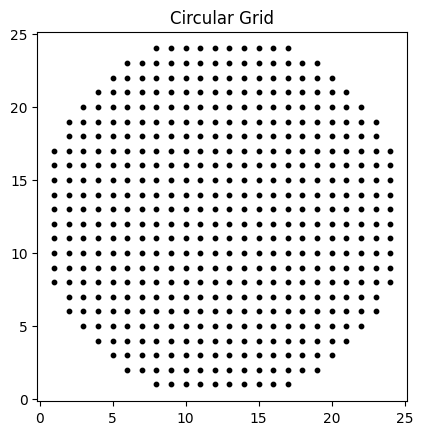

In [27]:
def laplacian_circle(n):
    """
    Create the Laplacian matrix for a circular grid with diameter n using finite difference method.
    :param n: Diameter of the circle (approximate number of points across the circle)
    :return: Sparse Laplacian matrix, grid points
    """
    
    # Generate circular grid points
    radius = n / 2
    points = []
    for i in range(n):
        for j in range(n):
            x, y = i - radius, j - radius
            if x**2 + y**2 <= radius**2:
                points.append((i, j))
    
    num_points = len(points)
    L = np.zeros((num_points, num_points))
    
    # Build Laplacian using finite differences
    point_indices = {point: idx for idx, point in enumerate(points)}
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-point stencil
    
    for (i, j), idx in point_indices.items():
        L[idx, idx] = -4
        for di, dj in directions:
            neighbor = (i + di, j + dj)
            if neighbor in point_indices:
                neighbor_idx = point_indices[neighbor]
                L[idx, neighbor_idx] = 1
    
    return sp.csr_matrix(L), points

def plot_grid(points):
    """Plot the circular grid."""
    x, y = zip(*points)
    plt.scatter(x, y, s=10, color='black')
    plt.gca().set_aspect('equal')
    plt.title("Circular Grid")
    plt.show()

# Example usage:
n = 25
laplacian, grid_points = laplacian_circle(n)
print(laplacian.toarray())
plot_grid(grid_points)
np.savetxt("circle_laplacian_points.txt", grid_points, fmt="%s", header="x, y", comments="")

np.savetxt("circle_laplacian_matrix.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix", comments="")

In [28]:
def solve_eigenmodes(shape, n, num_modes=6):
    """Solve for the eigenmodes of the specified shape."""
    if shape == 'square':
        L = laplacian_grid_square(n)
        # For visualization
        grid_shape = (n, n)
        reshape_func = lambda v: v.reshape(grid_shape)
    elif shape == 'circle':
        L, points = laplacian_circle(n)
        grid_shape = None
        reshape_func = lambda v: v  # No reshape for circle
    
    # Solve for eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigs(L, k=num_modes, which='SM')
    
    # For wave equation, eigenvalues should be negative
    eigenvalues = -eigenvalues
    
    #extract real part of eigenvalues and eigenvectors
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Sort eigenvalues and eigenvectors
    idx = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Calculate frequencies (sqrt of eigenvalues)
    frequencies = np.sqrt(eigenvalues)
    
    return frequencies, eigenvectors, grid_shape, reshape_func, points if shape == 'circle' else None

def plot_eigenmodes(shape, frequencies, eigenvectors, grid_shape, reshape_func, points=None):
    """Plot the first few eigenmodes."""
    num_modes = min(3, len(frequencies))
    
    for i in range(num_modes):
        plt.figure(figsize=(5, 4))
        if shape == 'square':
            mode = reshape_func(eigenvectors[:, i])
            plt.imshow(mode, cmap='RdBu')
            plt.colorbar(label='Amplitude')
        elif shape == 'circle':
            x, y = zip(*points)
            plt.scatter(x, y, c=eigenvectors[:, i], cmap='RdBu', s=30)
            plt.colorbar(label='Amplitude')
            plt.axis('equal')
        
        plt.title(f'Eigenmode {i+1}, λ = {frequencies[i]:.4f}')
        plt.tight_layout()
        plt.show()

def create_time_animation(shape, frequency, eigenvector, grid_shape, reshape_func, points=None):
    """Create an animation showing time evolution of an eigenmode."""
    fig, ax = plt.subplots(figsize=(5, 4))
    
    # Set up the initial plot
    if shape == 'square':
        mode = reshape_func(eigenvector)
        img = ax.imshow(mode, cmap='RdBu', interpolation='nearest',
                       vmin=-np.abs(eigenvector).max(), vmax=np.abs(eigenvector).max())
        plt.colorbar(img, ax=ax, label='Amplitude')
    elif shape == 'circle':
        x, y = zip(*points)
        scatter = ax.scatter(x, y, c=eigenvector, cmap='RdBu', s=30,
                           vmin=-np.abs(eigenvector).max(), vmax=np.abs(eigenvector).max())
        plt.colorbar(scatter, ax=ax, label='Amplitude')
        ax.set_aspect('equal')
    
    # Define the update function for animation
    def update(frame):
        # Time value between 0 and 2π
        t = 2 * np.pi * frame / 50
        # Apply time dependence: u(x,y,t) = v(x,y) * cos(λt)
        amplitude = np.cos(frequency * t)
        
        if shape == 'square':
            img.set_array(amplitude * reshape_func(eigenvector))
            return [img]
        elif shape == 'circle':
            scatter.set_array(amplitude * eigenvector)
            return [scatter]
    
    # Create the animation
    anim = FuncAnimation(fig, update, frames=50, interval=100, blit=True)
    
    # Display the title
    ax.set_title(f'Eigenmode Time Evolution, λ = {frequency:.4f}')
    plt.tight_layout()
    
    return anim, fig

Computing eigenmodes for square with L=1.0

Eigenfrequencies (resonance frequencies):
Mode 1: λ = 0.211369
Mode 2: λ = 0.333456
Mode 3: λ = 0.333456
Mode 4: λ = 0.421555
Mode 5: λ = 0.469468
Mode 6: λ = 0.469468


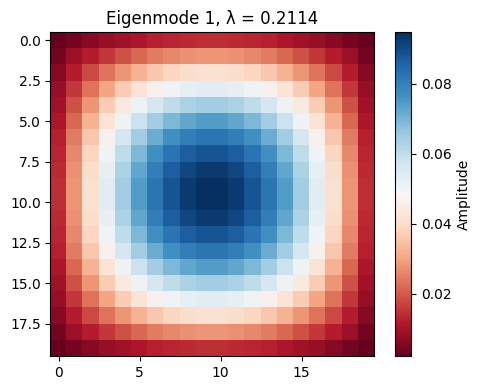

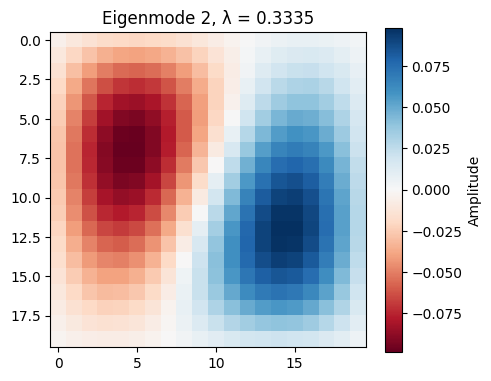

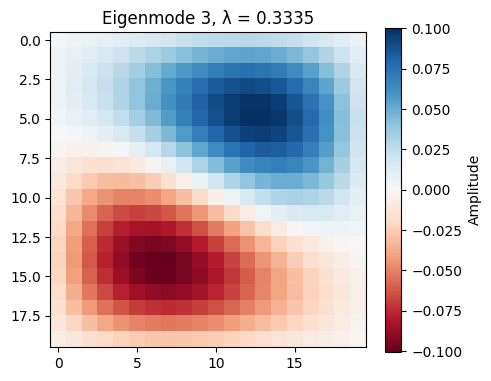


Computing eigenmodes for circle with L=1.0


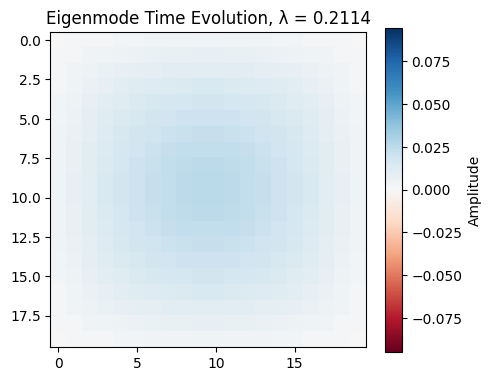

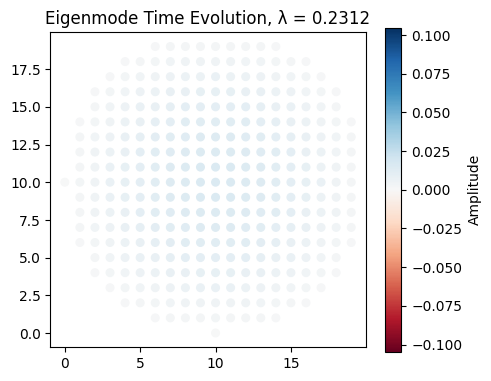

In [ ]:

# Parameters
L = 1.0
n = 20  # Grid size


### First for the square ###
shape = 'square'
# Solve for eigenvalues and eigenvectors
print(f"Computing eigenmodes for {shape} with L={L}")
frequencies, eigenvectors, grid_shape, reshape_func, points = solve_eigenmodes(shape, n)

# Print the eigenfrequencies
print("\nEigenfrequencies (resonance frequencies):")
for i, freq in enumerate(frequencies[:6]):
    print(f"Mode {i+1}: λ = {freq:.6f}")

# Plot the first few eigenmodes
plot_eigenmodes(shape, frequencies, eigenvectors, grid_shape, reshape_func, points)

# Create time evolution animation for the first eigenmode
anim, fig = create_time_animation(
    shape, frequencies[0], eigenvectors[:, 0], 
    grid_shape, reshape_func, points
)

# Save the animation
anim.save('eigenmode_animation.gif', writer='pillow', fps=10)

### Second the circle ###
shape = 'circle'
print(f"\nComputing eigenmodes for {shape} with L={L}")
frequencies, eigenvectors, grid_shape, reshape_func, points = solve_eigenmodes(shape, n)

anim, fig = create_time_animation(
    shape, frequencies[0], eigenvectors[:, 0], 
    grid_shape, reshape_func, points
)

anim.save('circle_eigenmode_animation.gif', writer='pillow', fps=10)
